In [2]:
# This Python 3 environment 
# Yuma Ra
#importing necessary Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#importing machine learninf models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier




In [3]:
#importing dataset water-data.csv
water_df = pd.read_csv("/kaggle/input/water-dataset/water-data.csv")

In [4]:
# Displaying the first few rows of the 'water_df' DataFrame
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Generating descriptive statistics for the 'water_df' DataFrame
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# Displaying concise information about the 'water_df' DataFrame
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
#Checking the shape of "water_df"
water_df.shape

(3276, 10)

# **Checking Null Values and Handling**

In [8]:
#checking null value in the dataset
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
#imputing dataset using mean
water_df_clean = water_df.fillna(water_df.mean())

In [10]:
#checking null value after data cleaning by imputing the null values
water_df_clean.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Data Duplication Checking**

In [11]:
#checking duplicate rows
duplicate_rows = water_df_clean[water_df_clean.duplicated()]

In [12]:
print(duplicate_rows)

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


In [13]:
#saving the cleaned dataset
water_df_clean.to_csv('cleaned_water_dataset.csv', index=False)

In [14]:
#checking the cleaned dataset head
water_df_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
#checking the cleaned dataset tail
water_df_clean.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


In [16]:
print(water_df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


# **Data Visualization**

In [17]:
#histogram showing value of Ph
fig_hist = px.histogram(water_df_clean, x=water_df_clean.columns[:1], marginal='rug', title='Data Histogram')
fig_hist.show()


In [18]:
#Box plot data visualization 
fig_box = px.box(water_df_clean, y=water_df_clean.columns[:-1], points="all", color='Potability',
                 title='Data Visualization Box Plot',
                 category_orders={'Potability': [0, 1]},
                 color_discrete_map={0: 'lightblue', 1: 'lightcoral'})
fig_box.update_traces(marker=dict(size=1))
fig_box.show()

In [19]:
fig_scatter_matrix = px.scatter_matrix(water_df, dimensions=water_df.columns[:-1], color='Potability', title='Scatter Matrix')

# Setting the size of the scatter matrix to make data more clear
fig_scatter_matrix.update_layout(
    height=1400,  
    width=1050   
)

# Makeing diagonal plots visible
fig_scatter_matrix.update_traces(diagonal_visible=False)

fig_scatter_matrix.show()

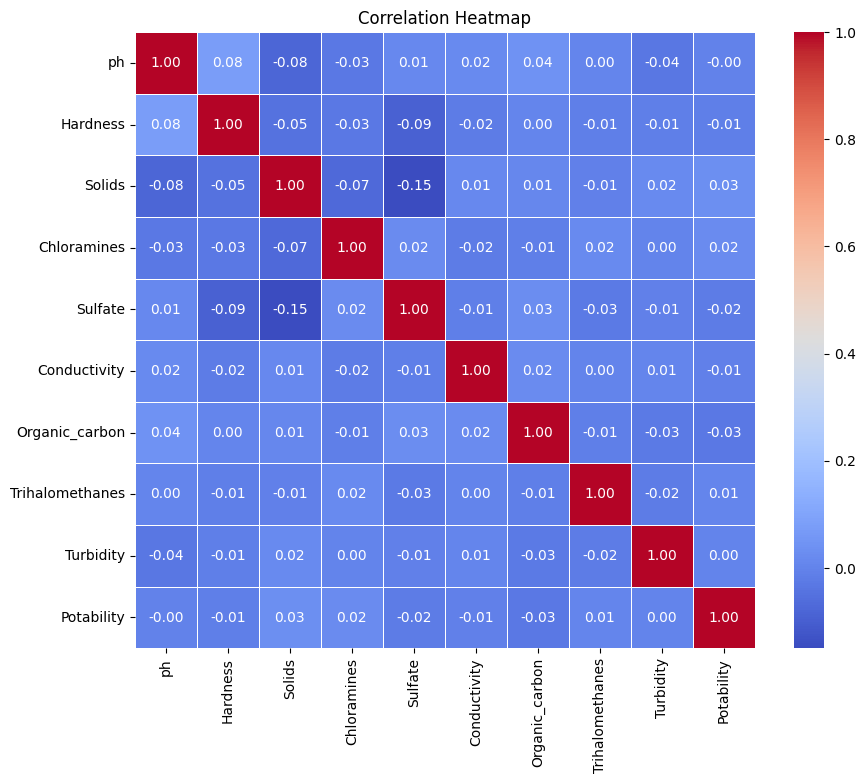

In [20]:
#correlation data visualization
correlation_matrix = water_df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

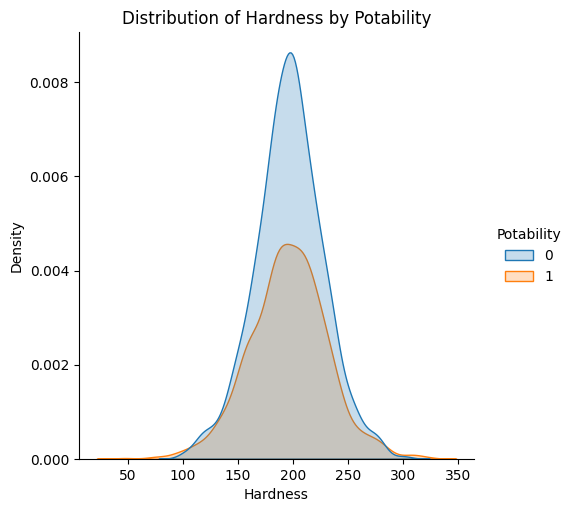

In [21]:
#data visualization by the columns hardness and potability
sns.displot(water_df_clean, x='Hardness', hue='Potability', kind='kde', fill=True)
plt.title('Distribution of Hardness by Potability')
plt.show()

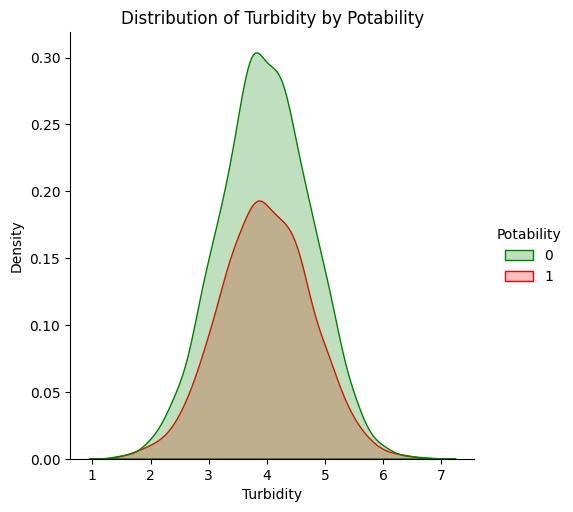

In [22]:
#data visualization by the columns turbidity and potability
custom_palette = {0: 'green', 1: 'red'}
sns.displot(water_df, x='Turbidity', hue='Potability', kind='kde', fill=True, palette=custom_palette) #using custom_palette to change color
plt.title('Distribution of Turbidity by Potability')
plt.show()

In [23]:
#data visualization using 3d scatter plot
fig_3d = px.scatter_3d(water_df_clean, x='Chloramines', y='Sulfate', z='Solids', color='Potability',
                       title='3D Scatter Plot of Chlormines,Sulfate and Solids')
fig_3d.show()

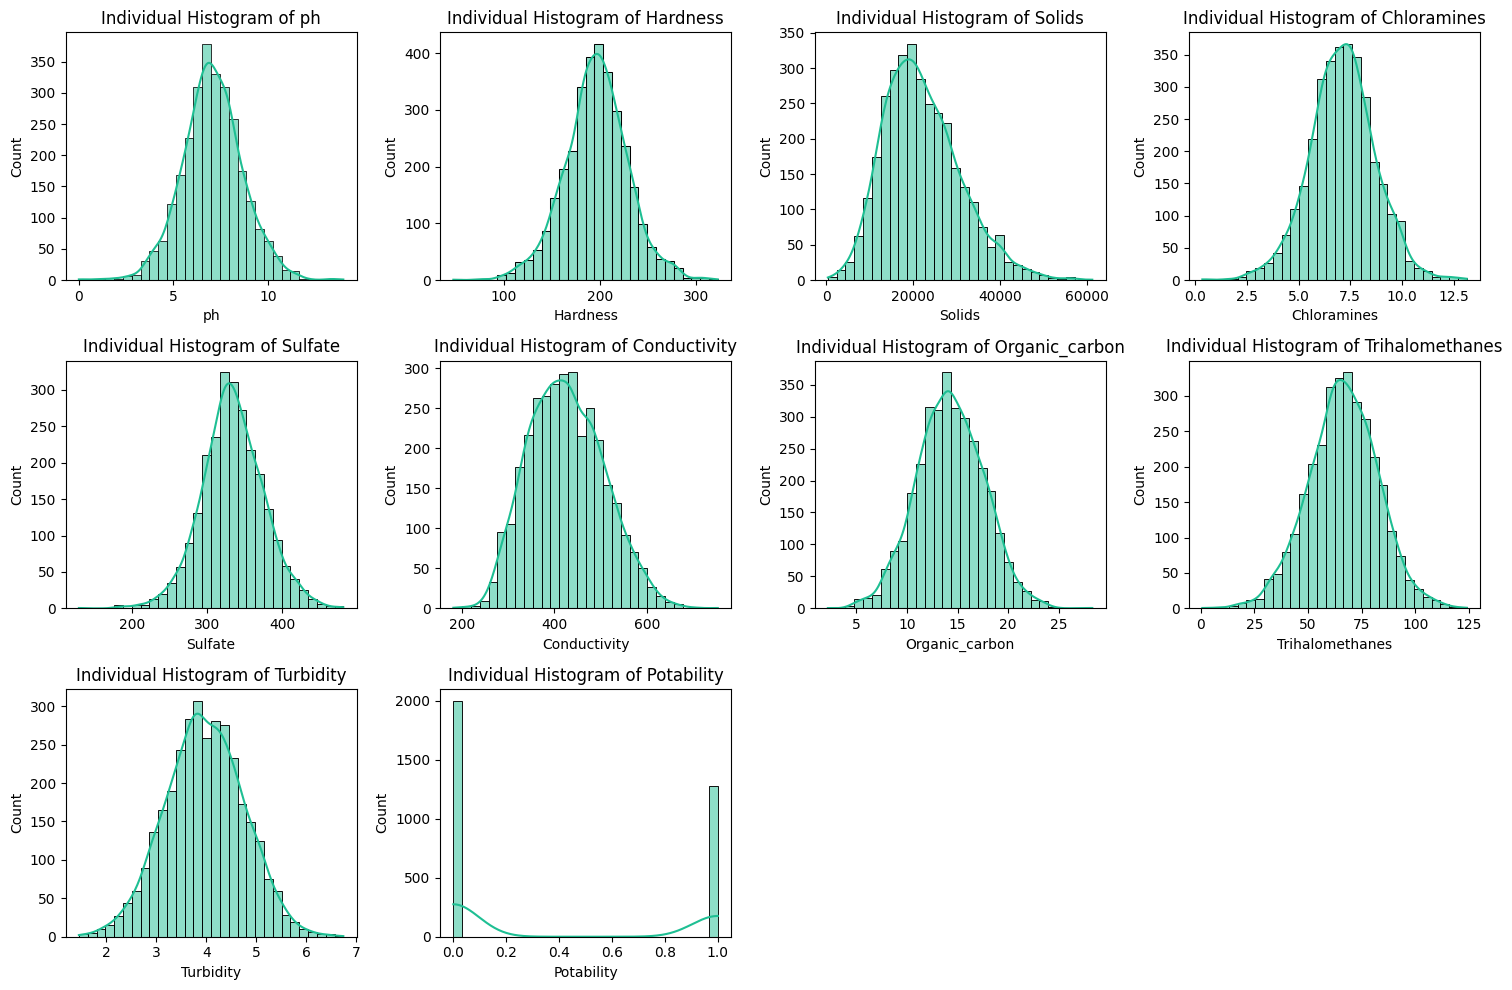

In [24]:
#histogram of all the columns in dataset
hist_color = '#1EBF93'
plt.figure(figsize=(15, 10))
for i, column in enumerate(water_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(water_df[column], kde=True, bins=30, color=hist_color)#using different color
    plt.title(f'Individual Histogram of {column}')
    plt.tight_layout()

plt.show()

# **Modeling and Proessing the data**

In [25]:
# Extracting features (X) by removing the "Potability" column from the DataFrame
X = water_df_clean.drop("Potability", axis=1)
# Extracting the target variable (y) by selecting only the "Potability" column from the DataFrame
y = water_df_clean["Potability"]

In [26]:
from sklearn.preprocessing import StandardScaler
# Creating a StandardScaler object
# It's used to make sure all features contribute equally to the model
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
#test_size=0.3: Allocate 30% of the data for testing, 70% for training
# random_state=30: Set a specific random seed for reproducibility

# **Machine Learning Models**
1. **NaiveBayes**
2. **Logistic Regression**
3. **KNeighbours**

# **NaiveBayes**

In [35]:
#NaiveBayes1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)


Accuracy: 0.6154628687690743
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.71       603
           1       0.50      0.40      0.44       380

    accuracy                           0.62       983
   macro avg       0.58      0.58      0.58       983
weighted avg       0.60      0.62      0.60       983



In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate

# Assuming you have already trained and predicted with your Naive Bayes model
y_pred_nb = water_nb_model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_nb, average='binary')
recall = recall_score(y_test, y_pred_nb, average='binary')
f1 = f1_score(y_test, y_pred_nb, average='binary')
accuracy_nv = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
classification_rep = classification_report(y_test, y_pred_nb)

# Display the Naive Bayes metrics in a table
table_nb = [
    ["Precision", str(precision)],
    ["Recall", str(recall)],
    ["F1 Score", str(f1)],
    ["Accuracy", str(accuracy_nv)],
    ["Confusion Matrix", str(conf_matrix)],
    ["Classification Report", str(classification_rep)]
]

print(". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ")
print("The Classification Report (Naive Bayes)")
print(". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ")
print(tabulate(table_nb, headers=["Metric", "Value"], tablefmt="fancy_grid"))



NameError: name 'water_nb_model' is not defined

In [ ]:
# Create and plot the confusion matrix
cm_navive = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
cm_navive_display = ConfusionMatrixDisplay(confusion_matrix=cm_navive, display_labels=['Class 0', 'Class 1'])
cm_navive_display.plot(cmap='viridis')
plt.title("Confusion Matrix Naive Bayes")
plt.show()

# **Logistic Regression**

In [ ]:
import warnings

from tabulate import tabulate

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UserWarning)
# Creating a Logistic Regression model
water_logistic_model= LogisticRegression(random_state=30)

# Training the model
water_logistic_model.fit(X_train_scaled, y_train) 
# Making predictions on the test set
y_pred_logreg = water_logistic_model.predict(X_test_scaled)

# Evaluating the Logistic Regression model
precision = precision_score(y_test, y_pred_logreg, average='binary', zero_division=1)
recall = recall_score(y_test, y_pred_logreg, average='binary', zero_division=1)
f1 = f1_score(y_test, y_pred_logreg, average='binary', zero_division=1)
accuracy_lg = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
classification_rep = classification_report(y_test, y_pred_logreg)

# Display the metrics in a formatted table
table = [
    ["Precision", str(precision)],
    ["Recall", str(recall)],
    ["F1 Score", str(f1)],
    ["Accuracy", str(accuracy_lg)],
    ["Confusion Matrix", str(conf_matrix)],S
    ["Classification Report", str(classification_rep)]
]

print(". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ")
print("The Classification Report (Logistic Regression)")
print(". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ")
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

In [ ]:

water_logistic_model = LogisticRegression(random_state=30)
water_logistic_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = water_logistic_model.predict(X_test)

# Create a confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic , annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix of Logistic Regression", size=15)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
probabilities = water_logistic_model.predict_proba(X_test)

# The 'probabilities' array contains two columns: 
# Column 0: Probability of class 0 (negative class)
# Column 1: Probability of class 1 (positive class)

# Display the first few rows of the predicted probabilities
print("Probabilistic Predictions for Logistic Regression:")
print(probabilities[:10])

# **KNeighbours**

In [32]:

# Create a KNN model
water_knn_model = KNeighborsClassifier(n_neighbors=10) 

# Training the model
water_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = water_knn_model.predict(X_test)

# Evaluating the KNN model
precision_knn = precision_score(y_test, y_pred_knn, average='binary', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='binary', zero_division=1)
f1_knn = f1_score(y_test, y_pred_knn, average='binary', zero_division=1)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Displaying the evaluation metrics in a formatted table
table_knn_model = [
    ["Precision", str(precision_knn)],
    ["Recall", str(recall_knn)],
    ["F1 Score", str(f1_knn)],
    ["Accuracy", str(accuracy_knn)],
    ["Confusion Matrix", str(conf_matrix_knn)],
    ["Classification Report", str(classification_rep_knn)]
]

print(". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ")
print("The Classification Report (KNN)")
print(". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ")
print(tabulate(table_knn_model, headers=["Metric", "Value"], tablefmt="fancy_grid"))



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
The Classification Report (KNN)
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
╒═══════════════════════╤═══════════════════════════════════════════════════════╕
│ Metric                │ Value                                                 │
╞═══════════════════════╪═══════════════════════════════════════════════════════╡
│ Precision             │ 0.609271523178808                                     │
├───────────────────────┼───────────────────────────────────────────────────────┤
│ Recall                │ 0.24210526315789474                                   │
├───────────────────────┼───────────────────────────────────────────────────────┤
│ F1 Score              │ 0.3465160075329567                                    │
├───────────────────────┼───────────────────────────────────────────────────────┤
│ Accuracy              │ 0.646998982706002                                     │
├─────────────

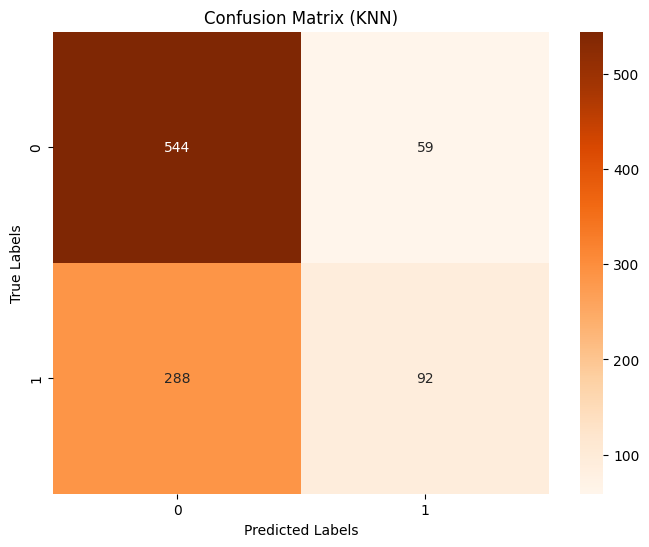

In [33]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming water_df_clean is your cleaned dataset with 'Potability' as the target variable
# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Create and train the KNN model
water_knn_model = KNeighborsClassifier(n_neighbors=10)
water_knn_model.fit(X_train, y_train)

# Make predictions on the test set for evaluation (this is just an example)
y_pred_test = water_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy)

# Now, let's use the trained model for prediction on a new data point

# New data point to predict
new_data_point = [
    5.584086638,
    188.3133238,
    28748.68774,
    7.544868789,
    326.6783629,
    280.4679159,
    8.39973464,
    54.91786184,
    2.559708228
]


# Reshape the new data point to match the expected input format
new_data_point_reshaped = [new_data_point]

# Use the trained model to make predictions
predicted_potability = water_knn_model.predict(new_data_point_reshaped)

# Display the prediction
print("Predicted Potability:", predicted_potability)


Accuracy on test set: 0.646998982706002
Predicted Potability: [1]


# **Final Result**

In [ ]:
accuracy_result = pd.DataFrame({
    'Algorithm': ['NaiveBayes', 'LogisticRegression', 'KNeighborsClassifier'],
    'Score': [accuracy_nv,accuracy_lg,accuracy_knn]
})
 
accuracy_result

In [ ]:

#Based on the datafram accuracy_result.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(x='Algorithm', y='Score', data=accuracy_result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=accuracy_result.Algorithm, rotation=300)
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Example with Naive Bayes
nb = GaussianNB()
nb_scores = cross_val_score(nb, X, y, cv=5)  # Cross-validation

# Example with Logistic Regression
lr = LogisticRegression()
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid.fit(X, y)

# Example with KNN
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})